## Summary:
---
In this report I classify my own handwriting using the a classifier from the last homework. I started by reading in the image using the PIL library, then I split it up into the individual digits, and then convert them into the same form as the digits dataset for classification purposes. After this I classify the samples.

Note: The most accurate classifier in the previous assignment was a KNeighbors classifier with `n_neighbors = 3`, so that's what I use to classify my handwriting. 



### Handwriting digitization process
To get the image of the digits I wrote the digits 0-9 on graph paper to ensure proper spacing. After this I simply took a picture of with my phone, boosted the contrast a bit (to clarify the shapes), and cropped the image to only contain the digits. 

---

## Setup
---
### Imports
importing libraries...

In [1]:
# For plotting images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# For our classifiers
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree

# For picture manipulation
from PIL import Image

# For creating directories
import os

# For data storage
import numpy as np

---
## Seperating Images
---

### Reading in Table Images

Response #1:


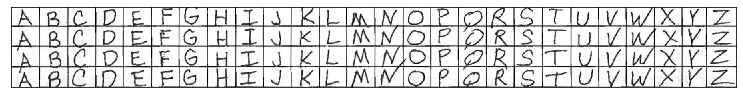

Response #2:


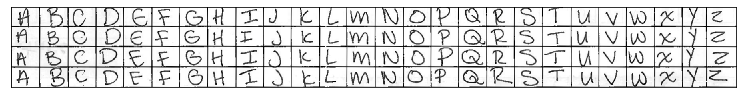

Response #3:


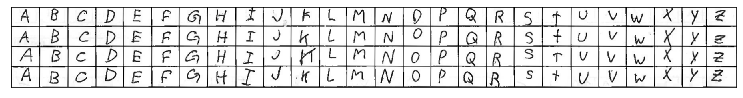

Response #4:


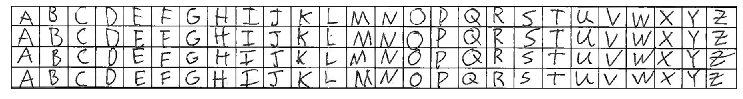

Response #5:


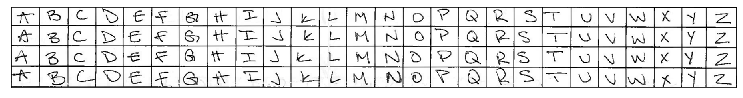

Response #6:


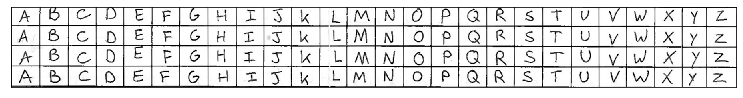

In [2]:
directory = "Responses"
prefix = "Table_"
postfix = ".png"
response_num = 6

tables = []
for i in range(1, response_num+1):
    image = directory+"/"+prefix+str(i)+postfix
    tables.append(Image.open(image))

for i, table in enumerate(tables):
    print(f"Response #{i+1}:")
    plt.figure(figsize=(26/2,4/2))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(table)
    plt.show()

### Resizing Tables

Response #1:


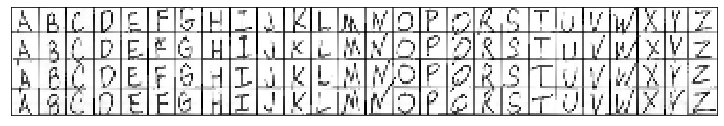

Response #2:


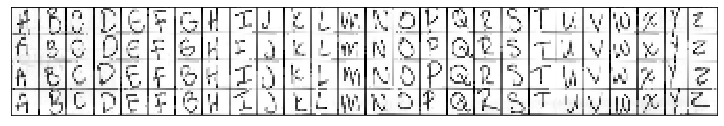

Response #3:


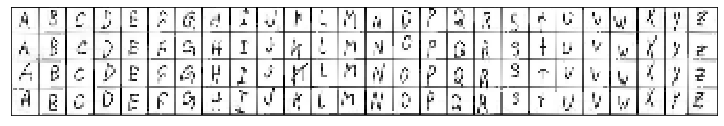

Response #4:


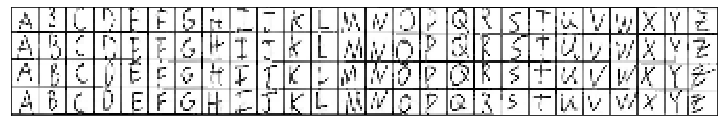

Response #5:


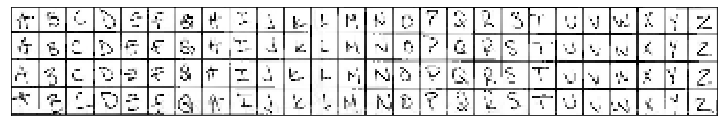

Response #6:


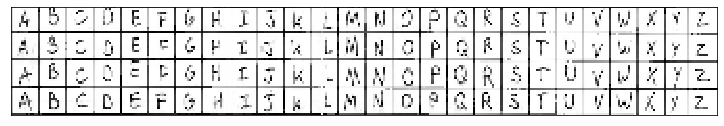

In [3]:
box_dim = 13 # Width/height of individual letter boxes

# Width/height of resized tables
width = box_dim*26
height = box_dim*4

tables_resized = tables.copy()
for i in range(len(tables)):
    tables_resized[i] = tables_resized[i].resize((width, height))

for i, table in enumerate(tables_resized):
    print(f"Response #{i+1}:")
    plt.figure(figsize=(26/2,4/2))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(table)
    plt.show()

### Seperating Tables into Individual Letters
Along with reading each letter individually, I will also white out the perimeter. If I didn't do this, the letter boxes would interfere with the classifier.

In [4]:
letters = []
for table_num, table in enumerate(tables_resized):
    for column in range(26):
        for row in range(4):
            # Cropping image
            top_left = [ column*box_dim, row*box_dim]
            bottom_right = [top_left[0]+box_dim, top_left[1]+box_dim]
            coords = top_left+bottom_right
            
            cropped = np.array(table.crop(coords))
            
            # Whiting out the border
            cropped[0] = [ [255,255,255] for i in range(box_dim)]
            cropped[box_dim-1] = [ [255,255,255] for i in range(box_dim)]
            for i in range(box_dim):
                cropped[i][0] = [255, 255, 255]
                cropped[i][box_dim-1] = [255, 255, 255]

            # Appending the whited out, letter to the list
            letters.append(cropped)

In [5]:
# print(letters)
letters_bw = []
for i, letter in enumerate(letters):
    letters_bw.append([])
    for x, row in enumerate(letters[i]):
        letters_bw[i].append([])
        for j, pixel in enumerate(letters[i][x]):
            letters_bw[i][x].append(sum(letters[i][x][j]))

#             print()
#             break
#         break
#     break
letters_bw

[[[765, 765, 765, 765, 765, 765, 765, 765, 765, 765, 765, 765, 765],
  [765, 765, 765, 765, 753, 759, 762, 762, 762, 765, 765, 765, 765],
  [765, 765, 765, 765, 753, 285, 759, 762, 762, 765, 762, 762, 765],
  [765, 765, 762, 753, 759, 147, 753, 765, 765, 765, 765, 765, 765],
  [765, 765, 765, 762, 759, 177, 750, 762, 762, 765, 765, 765, 765],
  [765, 765, 765, 765, 747, 456, 261, 753, 759, 765, 765, 765, 765],
  [765, 765, 765, 765, 585, 753, 468, 750, 759, 765, 765, 765, 765],
  [765, 765, 765, 762, 288, 753, 753, 315, 759, 765, 765, 765, 765],
  [765, 765, 765, 762, 165, 204, 231, 147, 759, 765, 765, 765, 765],
  [765, 762, 759, 759, 273, 753, 759, 747, 147, 750, 765, 765, 765],
  [765, 762, 759, 759, 750, 753, 759, 750, 192, 750, 765, 765, 765],
  [765, 753, 753, 372, 753, 753, 759, 759, 747, 153, 762, 762, 765],
  [765, 765, 765, 765, 765, 765, 765, 765, 765, 765, 765, 765, 765]],
 [[765, 765, 765, 765, 765, 765, 765, 765, 765, 765, 765, 765, 765],
  [765, 759, 759, 753, 750, 753, 

### Splitting data into Test/Train data
I will be using the first three handwriting samples from each table as training, and I will be testing the fourth. Since we are classifying by person, we will need 26 classifiers, thus 26 testing/training datasets

#### Splitting data

In [6]:
X_trains = [[] for x in range(26)]
y_trains = [[] for x in range(26)]

X_tests = [[] for x in range(26)]
y_tests = [[] for x in range(26)]

m = 10
count = 0
for i, letter in enumerate(letters_bw):
    index = int(i/4)%26
    
    if(i % 4 == 3): 
        X_tests[index].append(np.array(letter))
        y_tests[index].append(int(i/(26*4)))
    else:
        X_trains[index].append(np.array(letter))
        y_trains[index].append(int(i/(26*4)))
  

# converting to np.arrays for shaping purposes
for x in range(26):
    X_trains[x] = np.array(X_trains[x]).reshape(-1, 169)
    y_trains[x] = np.array(y_trains[x])

    X_tests[x] = np.array(X_tests[x]).reshape(-1, 169)
    y_tests[x] = np.array(y_tests[x])

In [7]:
X_trains[0].shape
# print(X_trains[0])

(18, 169)

From table 0


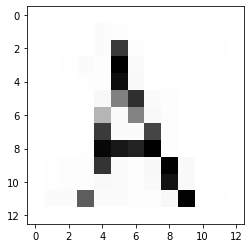

From table 0


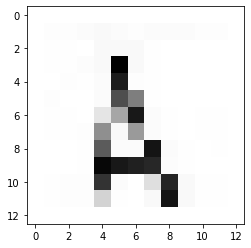

From table 0


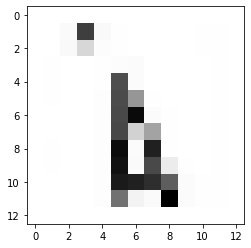

From table 1


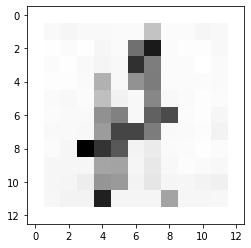

From table 1


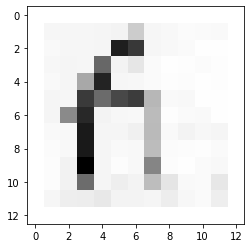

From table 1


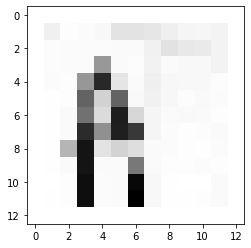

From table 2


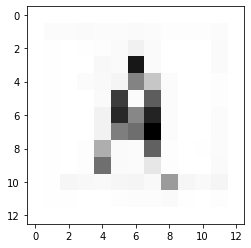

From table 2


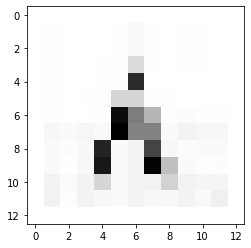

From table 2


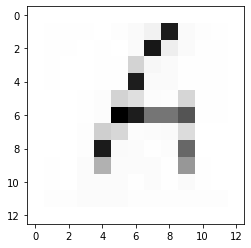

From table 3


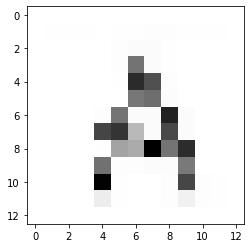

From table 3


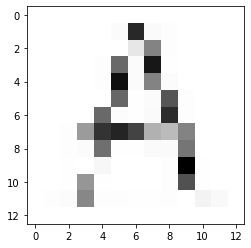

From table 3


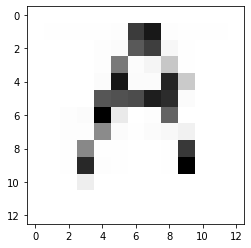

From table 4


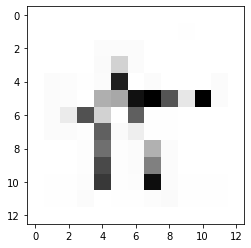

From table 4


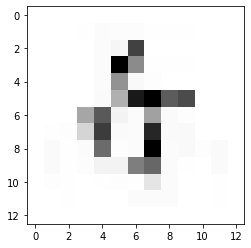

From table 4


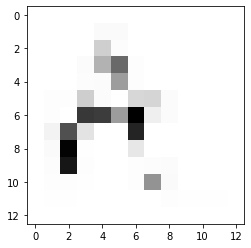

From table 5


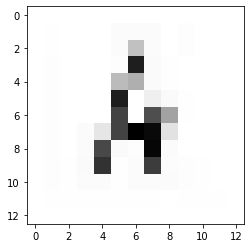

From table 5


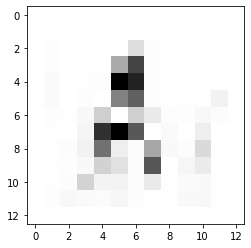

From table 5


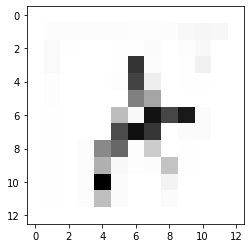

In [8]:
for i, letter in zip(y_trains[0], X_trains[0]):
    print("From table", i)
    plt.imshow(letter.reshape(box_dim, box_dim), cmap=plt.cm.binary_r)
    plt.show()

---
## Finding the Best Classifier
---

In this section, I will make three different classifiers and find the most accurate one.

In [ ]:
def plot_classified_digits(clf, X_test, y_test):
    

### Naive Beyes

In [9]:
clfs = [naive_bayes.GaussianNB() for x in range(26)]
for i in range(26):
    clfs[i].fit(X_trains[i], y_trains[i])

scores = [clfs[i].score(X_tests[i], y_tests[i]) for i in range(26)]

for i in range(26):
    print(chr(i+65), scores[i])

A 0.16666666666666666
B 0.16666666666666666
C 0.3333333333333333
D 0.16666666666666666
E 0.16666666666666666
F 0.16666666666666666
G 0.3333333333333333
H 0.3333333333333333
I 0.3333333333333333
J 0.3333333333333333
K 0.3333333333333333
L 0.6666666666666666
M 0.16666666666666666
N 0.5
O 0.3333333333333333
P 0.16666666666666666
Q 0.16666666666666666
R 0.3333333333333333
S 0.0
T 0.5
U 0.16666666666666666
V 0.16666666666666666
W 0.3333333333333333
X 0.16666666666666666
Y 0.16666666666666666
Z 0.16666666666666666


### KNeighbors

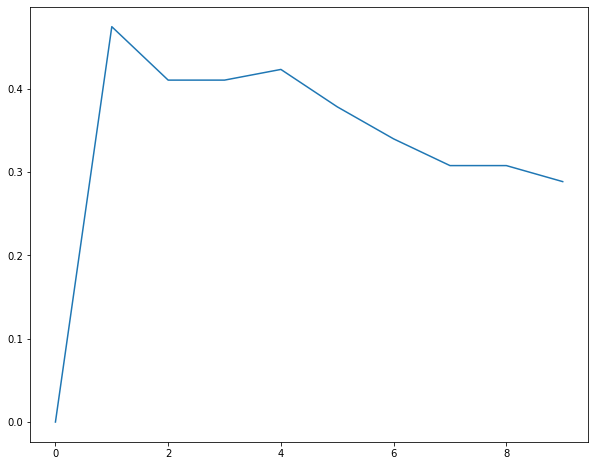

0.4102564102564103


In [10]:
scores_averages = []
for depth in range(1, 10):
    clfs = [neighbors.KNeighborsClassifier(n_neighbors=depth) for x in range(26)]
    for i in range(26):
        clfs[i].fit(X_trains[i], y_trains[i])

    scores = [clfs[i].score(X_tests[i], y_tests[i]) for i in range(26)]
    scores_averages.append(sum(scores)/len(scores))
    
plt.figure(figsize=(10,8))
plt.plot([0]+scores_averages)
plt.show()
print(scores_averages[1])

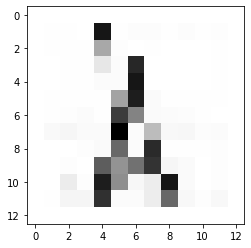

[ 6  9  4  7  1 14  2 13 16]


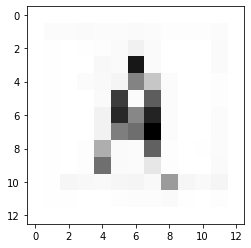

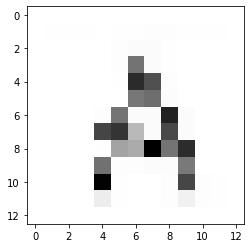

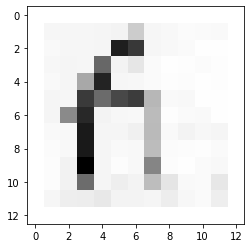

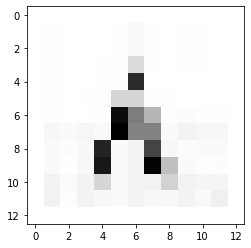

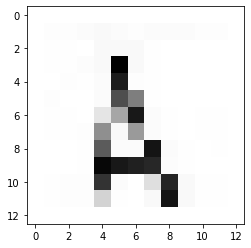

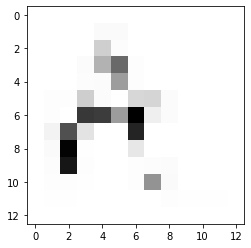

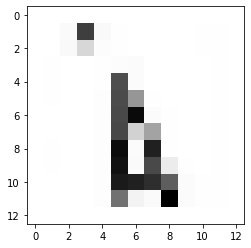

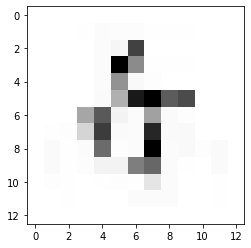

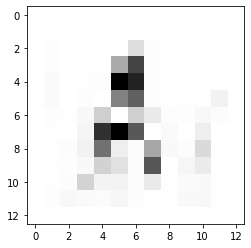

In [11]:
# print(X_tests[0][0])
plt.imshow(X_tests[0][0].reshape(13,13), cmap=plt.cm.binary_r)
plt.show()

distances, indexes = clfs[1].kneighbors(X_tests[0][0].reshape(1, 169))


print(indexes[0])
for i in indexes[0]:
    plt.imshow(X_trains[0][i].reshape(13,13), cmap=plt.cm.binary_r)
    plt.show()
    

### KNeighbors

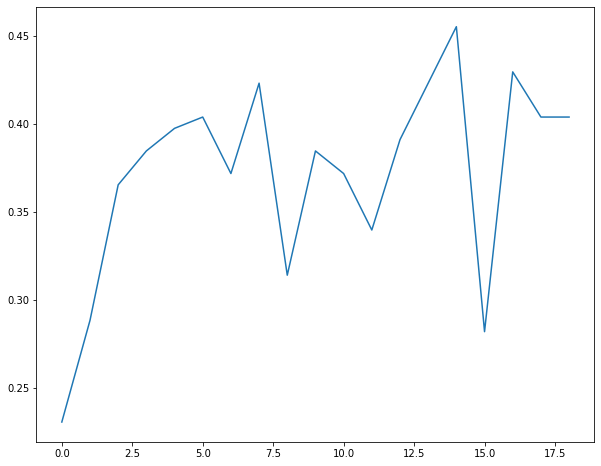

0 0.23076923076923084
1 0.28846153846153844
2 0.36538461538461536
3 0.38461538461538464
4 0.3974358974358974
5 0.40384615384615385
6 0.37179487179487175
7 0.4230769230769231
8 0.3141025641025641
9 0.38461538461538464
10 0.37179487179487175
11 0.33974358974358976
12 0.3910256410256409
13 0.4230769230769231
14 0.45512820512820523
15 0.28205128205128205
16 0.4294871794871794
17 0.4038461538461538
18 0.4038461538461537


In [12]:
scores_averages = []
for depth in range(1, 20):
    clfs = [tree.DecisionTreeClassifier(max_depth=depth) for x in range(26)]
    for i in range(26):
        clfs[i].fit(X_trains[i], y_trains[i])

    scores = [clfs[i].score(X_tests[i], y_tests[i]) for i in range(26)]
    scores_averages.append(sum(scores)/len(scores))
    # for i in range(26):
    #     print(chr(i+65), scores[i])
    
plt.figure(figsize=(10,8))
plt.plot(scores_averages)
plt.show()

for i, x in enumerate(scores_averages):
    print(i, x)

In [13]:
scores_averages[4]

0.3974358974358974